In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_pokemon = pd.read_csv('/home/giovanni/Programs/Python3/DataAnalyst-course/Esercizi/Giorno 10/pokemon_data.csv')
df_pokemon.head()

,id,name,base_experience,height,weight,types,abilities,moves,stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6..."
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8..."
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1..."
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6..."
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8..."


In [7]:
x = df_pokemon[['height']].values
y = df_pokemon[['weight']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (1041, 1), x_test: (261, 1), y_train: (1041, 1), y_test: (261, 1)


In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
print(f"Coefficients: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")
print(f"Score: {model.score(x_test, y_test)}")

Coefficients: 31.757172547475832
Intercept: 356.7355635170795
Score: -0.5986509379660025


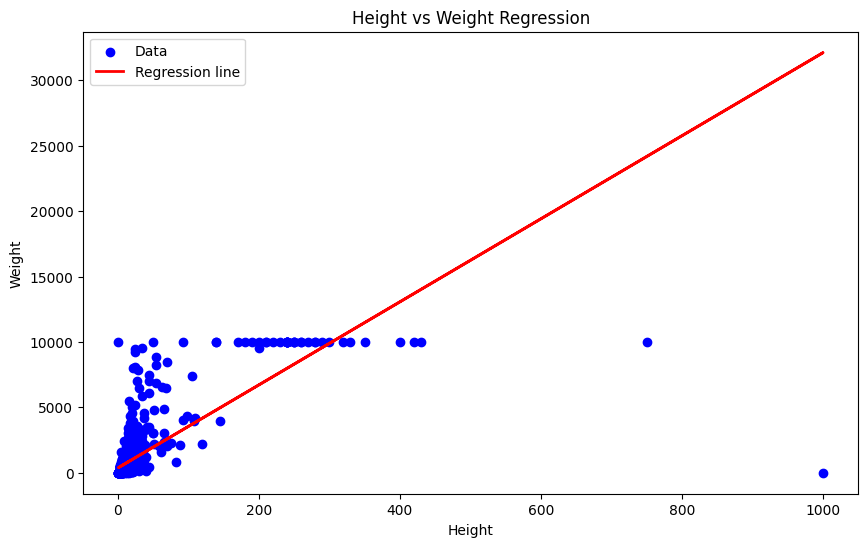

In [17]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
#plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight Regression')
#plt.yscale('log')
#plt.ylim(0, 11000)  # Adjust y-axis limits for better visibility
#plt.xlim(0, 200)  # Adjust x-axis limits for better visibility
plt.legend()
plt.show()

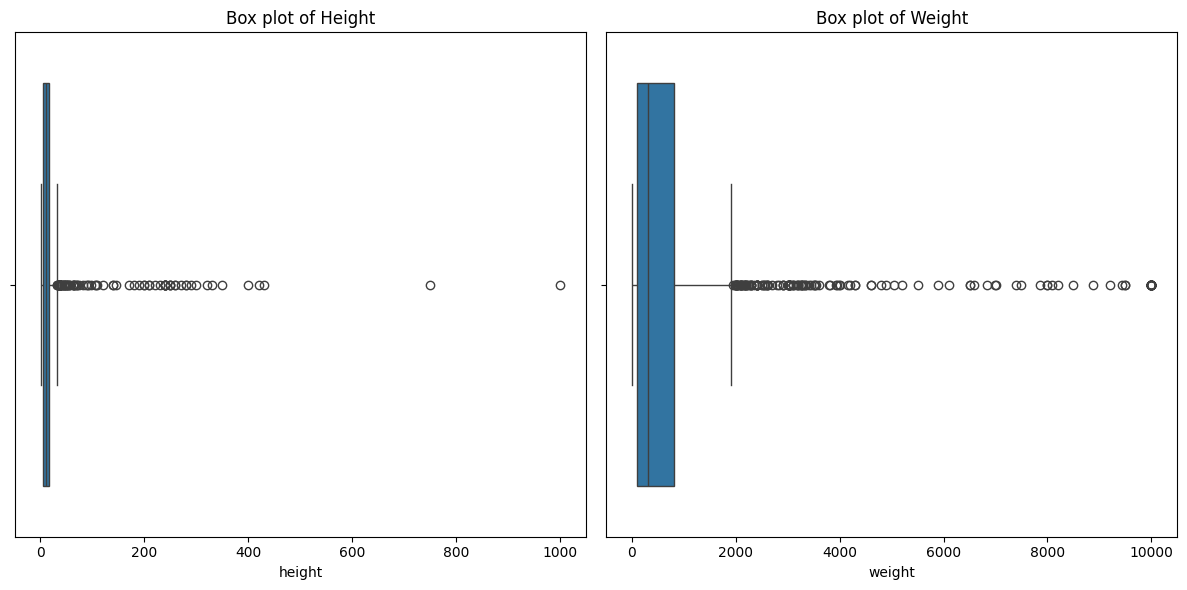

In [19]:
# box plot of height and weight on separate plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_pokemon['height'])
plt.title('Box plot of Height')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_pokemon['weight'])
plt.title('Box plot of Weight')

plt.tight_layout()
plt.show()

In [36]:
# stampa i valori oltre il quale il box plot considera outliers
print("Outliers in Height:")
height_outliers = df_pokemon[df_pokemon['height'] > df_pokemon['height'].quantile(0.75) + 1.5 * (df_pokemon['height'].quantile(0.75) - df_pokemon['height'].quantile(0.25))]
height_outliers = height_outliers.sort_values(by='height', ascending=False)
height_outliers


Outliers in Height:


,id,name,base_experience,height,weight,types,abilities,moves,stats
1214,10190,eternatus-eternamax,563,1000,0,"poison, dragon",pressure,"fly, flamethrower, hyper-beam, solar-beam, toxic","hp=255, attack=115, defense=250, special-attac..."
1244,10220,centiskorch-gmax,184,750,10000,"fire, bug","flash-fire, white-smoke, flame-body",NaN,"hp=100, attack=115, defense=65, special-attack..."
1249,10225,duraludon-gmax,187,430,10000,"steel, dragon","light-metal, heavy-metal, stalwart",NaN,"hp=70, attack=95, defense=115, special-attack=..."
1239,10215,coalossal-gmax,255,420,10000,"rock, fire","steam-engine, flame-body, flash-fire",NaN,"hp=110, attack=80, defense=120, special-attack..."
1235,10211,inteleon-gmax,265,400,10000,water,"torrent, sniper",NaN,"hp=70, attack=85, defense=65, special-attack=1..."
...,...,...,...,...,...,...,...,...,...
1019,1020,gouging-fire,295,35,5900,"fire, dragon",protosynthesis,"stomp, double-kick, body-slam, take-down, doub...","hp=105, attack=115, defense=121, special-attac..."
1291,10267,koraidon-gliding-build,335,35,3030,"fighting, dragon","orichalcum-pulse, orichalcum-pulse","swords-dance, body-slam, take-down, roar, flam...","hp=100, attack=135, defense=115, special-attac..."
790,791,solgaleo,306,34,2300,"psychic, steel",full-metal-body,"body-slam, take-down, double-edge, roar, flame...","hp=137, attack=137, defense=107, special-attac..."
496,497,serperior,238,33,630,grass,"overgrow, contrary","swords-dance, cut, bind, slam, vine-whip","hp=75, attack=75, defense=95, special-attack=7..."


In [38]:
print("Outliers in Weight:")
weight_outliers = df_pokemon[df_pokemon['weight'] > df_pokemon['weight'].quantile(0.75) + 1.5 * (df_pokemon['weight'].quantile(0.75) - df_pokemon['weight'].quantile(0.25))]
weight_outliers = weight_outliers.sort_values(by='weight', ascending=False)
weight_outliers

Outliers in Weight:


,id,name,base_experience,height,weight,types,abilities,moves,stats
1238,10214,drednaw-gmax,170,240,10000,"water, rock","strong-jaw, shell-armor, swift-swim",NaN,"hp=90, attack=115, defense=90, special-attack=..."
1237,10213,orbeetle-gmax,253,140,10000,"bug, psychic","swarm, frisk, telepathy",NaN,"hp=60, attack=45, defense=110, special-attack=..."
1236,10212,corviknight-gmax,248,140,10000,"flying, steel","pressure, unnerve, mirror-armor",NaN,"hp=98, attack=87, defense=105, special-attack=..."
1226,10202,gengar-gmax,225,200,10000,"ghost, poison",cursed-body,NaN,"hp=60, attack=65, defense=60, special-attack=1..."
1233,10209,rillaboom-gmax,265,280,10000,grass,"overgrow, grassy-surge",NaN,"hp=100, attack=125, defense=90, special-attack..."
...,...,...,...,...,...,...,...,...,...
894,895,regidrago,290,21,2000,dragon,dragons-maw,"vice-grip, body-slam, take-down, thrash, bite","hp=200, attack=100, defense=50, special-attack..."
557,558,crustle,170,14,2000,"bug, rock","sturdy, shell-armor, weak-armor","swords-dance, cut, sand-attack, hyper-beam, st...","hp=70, attack=105, defense=125, special-attack..."
249,250,ho-oh,306,38,1990,"fire, flying","pressure, regenerator","gust, whirlwind, fly, body-slam, take-down","hp=106, attack=130, defense=90, special-attack..."
243,244,entei,261,21,1980,fire,"pressure, inner-focus","cut, stomp, headbutt, body-slam, take-down","hp=115, attack=115, defense=85, special-attack..."


In [23]:
# filtra i Pokémon con height < 600 e weight < 9999
df_filtered = df_pokemon[(df_pokemon['height'] < 600) & (df_pokemon['weight'] < 9999)]
df_filtered


,id,name,base_experience,height,weight,types,abilities,moves,stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6..."
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8..."
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1..."
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6..."
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8..."
...,...,...,...,...,...,...,...,...,...
1297,10273,ogerpon-wellspring-mask,275,12,398,"grass, water",water-absorb,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=..."
1298,10274,ogerpon-hearthflame-mask,275,12,398,"grass, fire",mold-breaker,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=..."
1299,10275,ogerpon-cornerstone-mask,275,12,398,"grass, rock",sturdy,"swords-dance, slam, vine-whip, double-kick, ta...","hp=80, attack=120, defense=84, special-attack=..."
1300,10276,terapagos-terastal,90,3,160,normal,tera-shell,"headbutt, body-slam, take-down, double-edge, roar","hp=95, attack=95, defense=110, special-attack=..."


In [24]:
x_filtered = df_filtered[['height']].values
y_filtered = df_filtered[['weight']].values

x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(x_filtered, y_filtered, test_size=0.2, random_state=42)
print(f"x_train: {x_train_filtered.shape}, x_test: {x_test_filtered.shape}, y_train: {y_train_filtered.shape}, y_test: {y_test_filtered.shape}")

x_train: (1012, 1), x_test: (253, 1), y_train: (1012, 1), y_test: (253, 1)


In [25]:
model.fit(x_train_filtered, y_train_filtered)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Score: {model.score(x_test_filtered, y_test_filtered)}")

Coefficients: [[57.26608125]]
Intercept: [-25.3271018]
Score: 0.4983507555233322


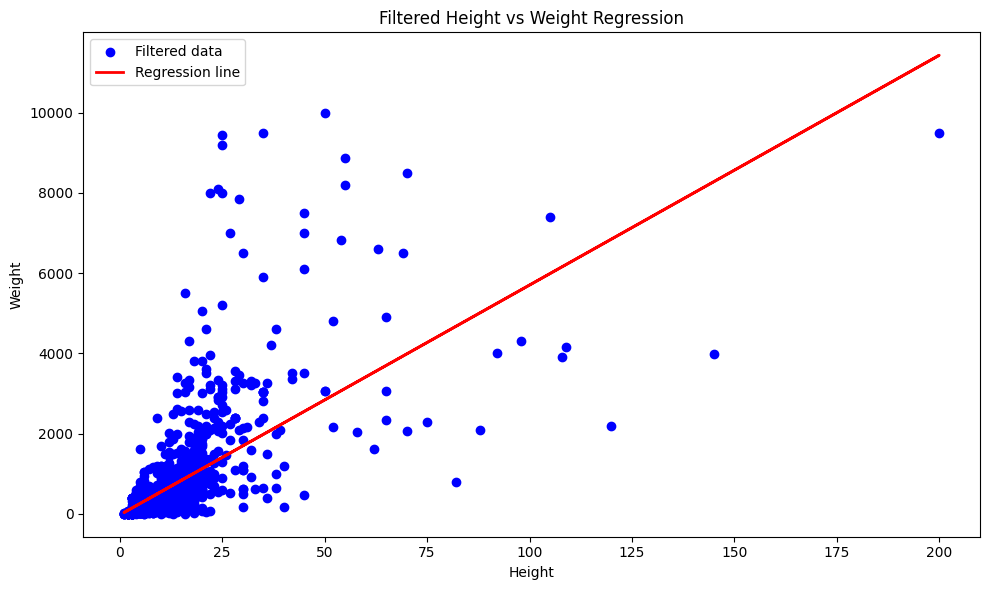

In [34]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_filtered, y_filtered, color='blue', label='Filtered data')
plt.plot(x_filtered, model.predict(x_filtered), color='red', linewidth=2, label='Regression line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Filtered Height vs Weight Regression')
#plt.ylim(-100, 2000) 
#plt.xlim(-1, 25)
plt.legend()
plt.tight_layout()
plt.show()